In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ccc.avif to ccc.avif
User uploaded file "ccc.avif" with length 62950 bytes


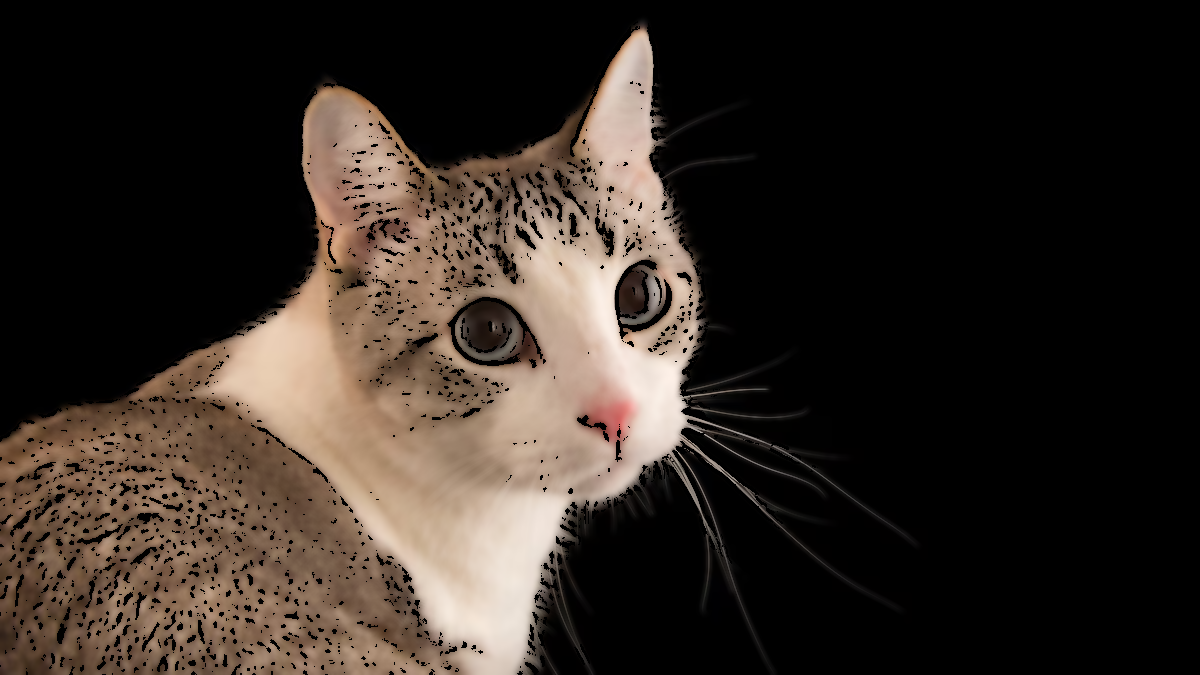

True

In [2]:
gimport cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

img = cv2.imread("ccc.avif")
if img is None:
    print("Image not found")
    exit()

# Prep grayscale & blur
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = cv2.medianBlur(g, 5)

# Edges
e = cv2.adaptiveThreshold(g, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                          cv2.THRESH_BINARY, 9, 9)

# Smooth color
c = cv2.bilateralFilter(img, 9, 250, 250)

# Combine
cartoon = cv2.bitwise_and(c, c, mask=e)

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(cartoon)
cv2.imwrite("cartoon_output.jpg", cartoon)
# cv2.waitKey(0) # Not needed with cv2_imshow
# cv2.destroyAllWindows() # Not needed with cv2_imshow